### Import

In [1]:
import os
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from transformers import Swinv2ForImageClassification, ViTForImageClassification

c:\adam_kacmar\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BASE_DIR = os.path.abspath("..").replace("\\", "/")

num_classes = 4
class_names = ["Healthy", "Black Rot", "Leaf Blight", "ESCA"]

model_dirs = [
    f"{BASE_DIR}/aug-hp-swinv2-base",
    f"{BASE_DIR}/aug-hp-vit-base",
    f"{BASE_DIR}/hp-swinv2-base",
    f"{BASE_DIR}/hp-vit-base"
]

data_roots = [
    f"{BASE_DIR}/dataset/test",
    f"{BASE_DIR}/augmented-dataset/test"
]

In [3]:
def load_model(model_path, model_type):
    if model_type == "swinv2":
        model = Swinv2ForImageClassification.from_pretrained(
            "microsoft/swinv2-base-patch4-window8-256",
            ignore_mismatched_sizes=True,
            num_labels=num_classes
        )
    elif model_type == "vit":
        model = ViTForImageClassification.from_pretrained(
            "google/vit-base-patch16-224",
            ignore_mismatched_sizes=True,
            num_labels=num_classes
        )
    else:
        raise ValueError("Unknown model type")

    state_dict = torch.load(model_path, map_location=device)
    model.load_state_dict(state_dict)
    model.to(device)
    model.eval()
    return model

Model: model_lr0.0001_bs16.pth (c:/adam_kacmar/aug-hp-swinv2-base)


Some weights of Swinv2ForImageClassification were not initialized from the model checkpoint at microsoft/swinv2-base-patch4-window8-256 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([4, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     1.0000    0.9449    0.9717       472
   Black Rot     0.9505    1.0000    0.9746       480
 Leaf Blight     1.0000    1.0000    1.0000       423
        ESCA     0.9977    1.0000    0.9988       430

    accuracy                         0.9856      1805
   macro avg     0.9870    0.9862    0.9863      1805
weighted avg     0.9863    0.9856    0.9856      1805



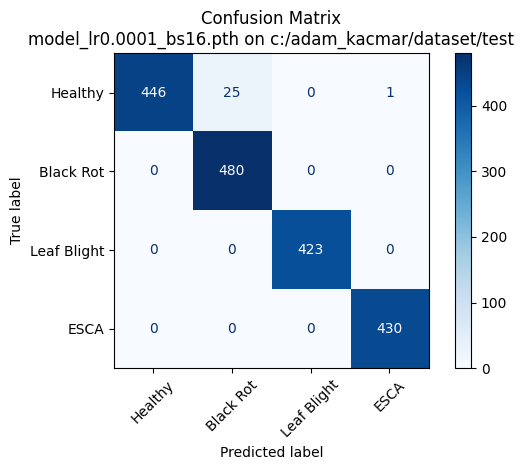


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.9968    0.9831    0.9899       944
   Black Rot     0.9886    0.9958    0.9922       960
 Leaf Blight     0.9965    1.0000    0.9982       846
        ESCA     0.9954    0.9988    0.9971       860

    accuracy                         0.9942      3610
   macro avg     0.9943    0.9944    0.9944      3610
weighted avg     0.9942    0.9942    0.9942      3610



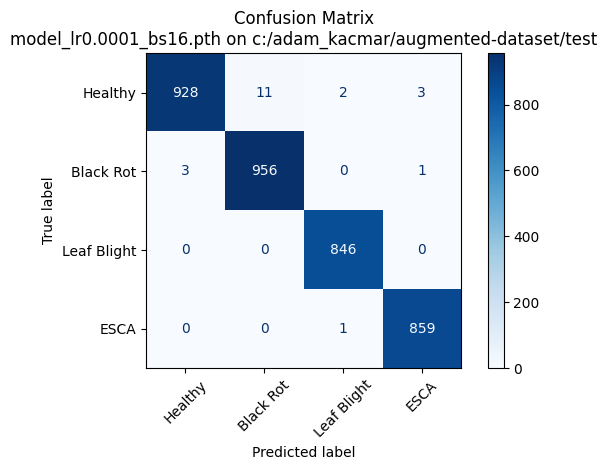

Model: model_lr0.0001_bs32.pth (c:/adam_kacmar/aug-hp-swinv2-base)


Some weights of Swinv2ForImageClassification were not initialized from the model checkpoint at microsoft/swinv2-base-patch4-window8-256 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([4, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.9979    0.9958    0.9968       472
   Black Rot     1.0000    0.9979    0.9990       480
 Leaf Blight     0.9976    1.0000    0.9988       423
        ESCA     0.9954    0.9977    0.9965       430

    accuracy                         0.9978      1805
   macro avg     0.9977    0.9978    0.9978      1805
weighted avg     0.9978    0.9978    0.9978      1805



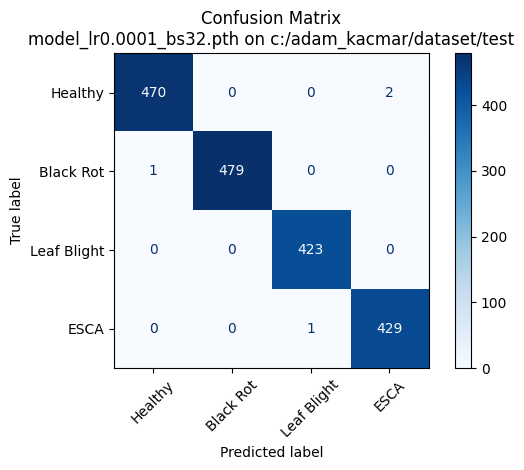


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.9852    0.9905    0.9878       944
   Black Rot     1.0000    0.9854    0.9927       960
 Leaf Blight     1.0000    1.0000    1.0000       846
        ESCA     0.9896    1.0000    0.9948       860

    accuracy                         0.9936      3610
   macro avg     0.9937    0.9940    0.9938      3610
weighted avg     0.9937    0.9936    0.9936      3610



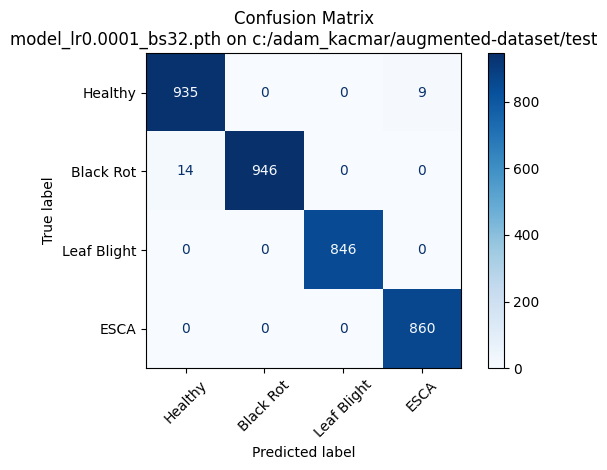

Model: model_lr0.0005_bs16.pth (c:/adam_kacmar/aug-hp-swinv2-base)


Some weights of Swinv2ForImageClassification were not initialized from the model checkpoint at microsoft/swinv2-base-patch4-window8-256 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([4, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.2865    0.7436    0.4137       472
   Black Rot     0.9921    0.2625    0.4152       480
 Leaf Blight     0.8540    0.5532    0.6714       423
        ESCA     0.3408    0.1419    0.2003       430

    accuracy                         0.4277      1805
   macro avg     0.6184    0.4253    0.4252      1805
weighted avg     0.6201    0.4277    0.4237      1805



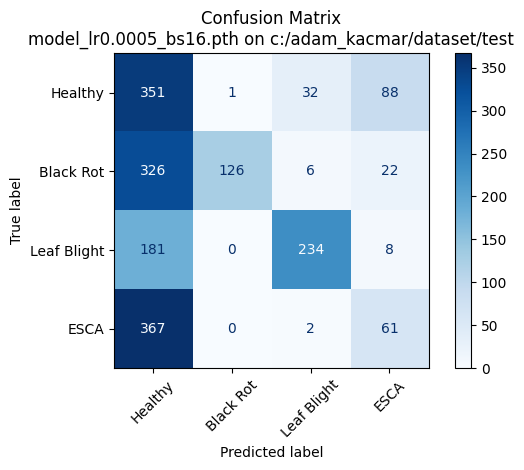


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.5019    0.9756    0.6628       944
   Black Rot     1.0000    0.6260    0.7700       960
 Leaf Blight     0.9480    0.8191    0.8789       846
        ESCA     0.9345    0.4814    0.6355       860

    accuracy                         0.7283      3610
   macro avg     0.8461    0.7256    0.7368      3610
weighted avg     0.8420    0.7283    0.7354      3610



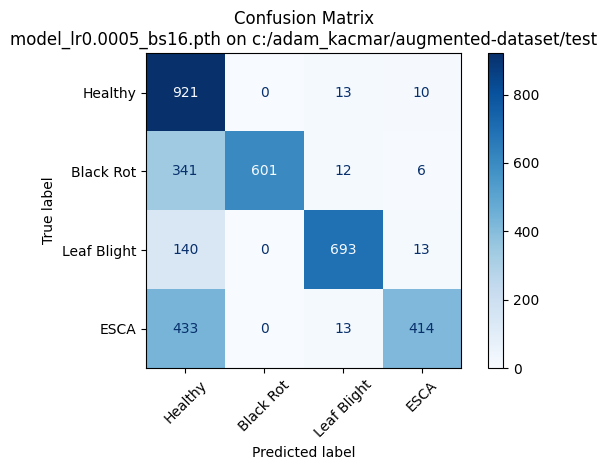

Model: model_lr0.0005_bs32.pth (c:/adam_kacmar/aug-hp-swinv2-base)


Some weights of Swinv2ForImageClassification were not initialized from the model checkpoint at microsoft/swinv2-base-patch4-window8-256 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([4, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.8523    0.7458    0.7955       472
   Black Rot     0.9944    0.7458    0.8524       480
 Leaf Blight     0.6508    0.9693    0.7787       423
        ESCA     0.8284    0.7744    0.8005       430

    accuracy                         0.8050      1805
   macro avg     0.8315    0.8088    0.8068      1805
weighted avg     0.8372    0.8050    0.8079      1805



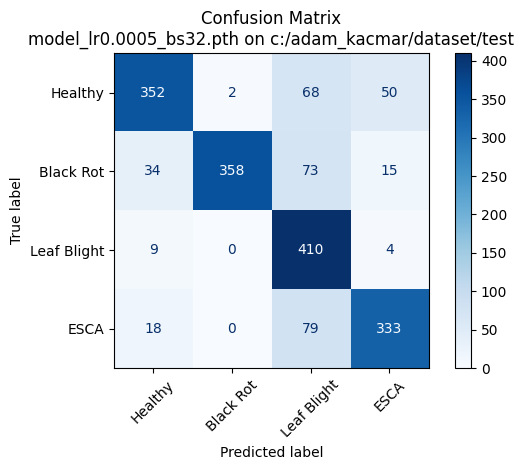


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.9719    0.9534    0.9626       944
   Black Rot     0.9989    0.9583    0.9782       960
 Leaf Blight     0.9338    1.0000    0.9658       846
        ESCA     0.9802    0.9767    0.9785       860

    accuracy                         0.9712      3610
   macro avg     0.9712    0.9721    0.9712      3610
weighted avg     0.9721    0.9712    0.9713      3610



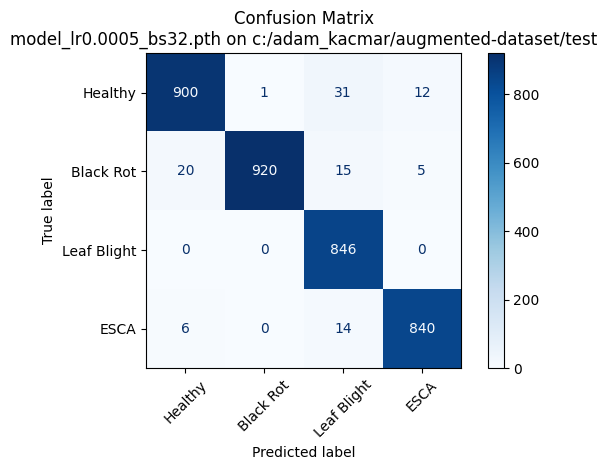

Model: model_lr1e-05_bs16.pth (c:/adam_kacmar/aug-hp-swinv2-base)


Some weights of Swinv2ForImageClassification were not initialized from the model checkpoint at microsoft/swinv2-base-patch4-window8-256 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([4, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.9672    1.0000    0.9833       472
   Black Rot     1.0000    1.0000    1.0000       480
 Leaf Blight     1.0000    0.9622    0.9807       423
        ESCA     1.0000    1.0000    1.0000       430

    accuracy                         0.9911      1805
   macro avg     0.9918    0.9905    0.9910      1805
weighted avg     0.9914    0.9911    0.9911      1805



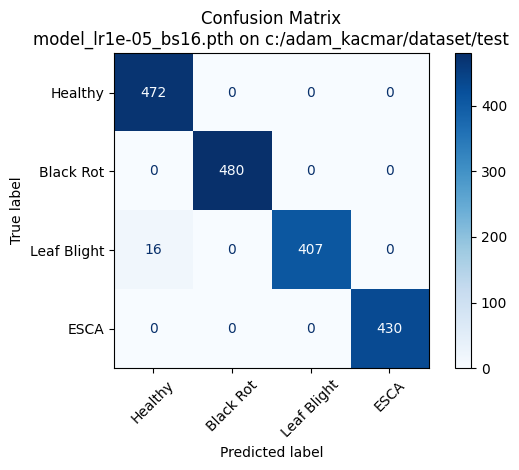


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.9947    1.0000    0.9974       944
   Black Rot     1.0000    0.9948    0.9974       960
 Leaf Blight     1.0000    1.0000    1.0000       846
        ESCA     1.0000    1.0000    1.0000       860

    accuracy                         0.9986      3610
   macro avg     0.9987    0.9987    0.9987      3610
weighted avg     0.9986    0.9986    0.9986      3610



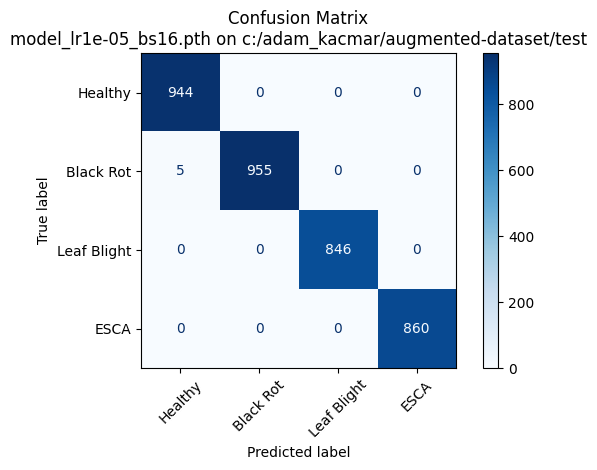

Model: model_lr1e-05_bs32.pth (c:/adam_kacmar/aug-hp-swinv2-base)


Some weights of Swinv2ForImageClassification were not initialized from the model checkpoint at microsoft/swinv2-base-patch4-window8-256 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([4, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.9979    1.0000    0.9989       472
   Black Rot     1.0000    1.0000    1.0000       480
 Leaf Blight     1.0000    0.9976    0.9988       423
        ESCA     1.0000    1.0000    1.0000       430

    accuracy                         0.9994      1805
   macro avg     0.9995    0.9994    0.9994      1805
weighted avg     0.9994    0.9994    0.9994      1805



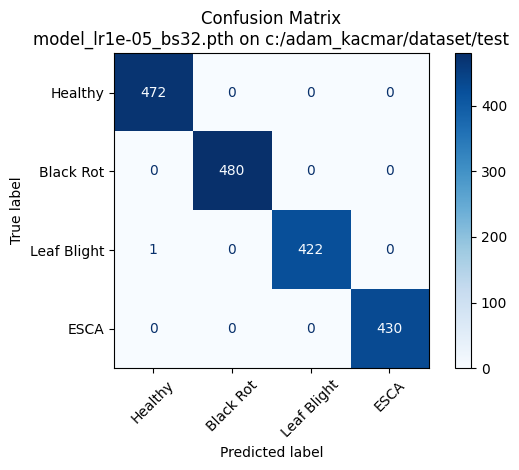


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.9937    0.9979    0.9958       944
   Black Rot     0.9990    0.9938    0.9963       960
 Leaf Blight     1.0000    1.0000    1.0000       846
        ESCA     0.9988    1.0000    0.9994       860

    accuracy                         0.9978      3610
   macro avg     0.9979    0.9979    0.9979      3610
weighted avg     0.9978    0.9978    0.9978      3610



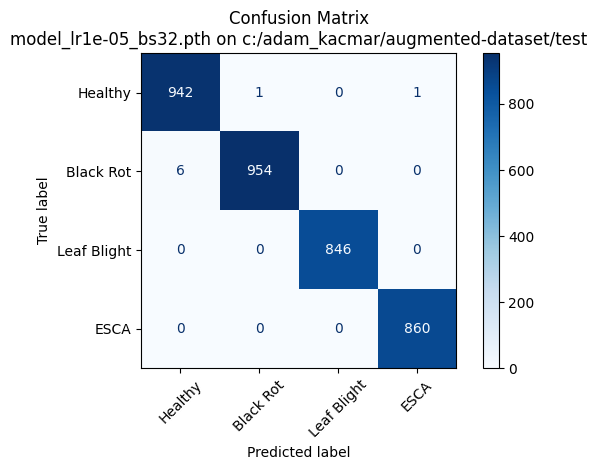

Model: model_lr0.0001_bs16.pth (c:/adam_kacmar/aug-hp-vit-base)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only`


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.9957    0.9894    0.9926       472
   Black Rot     0.9897    0.9979    0.9938       480
 Leaf Blight     1.0000    1.0000    1.0000       423
        ESCA     1.0000    0.9977    0.9988       430

    accuracy                         0.9961      1805
   macro avg     0.9964    0.9962    0.9963      1805
weighted avg     0.9961    0.9961    0.9961      1805



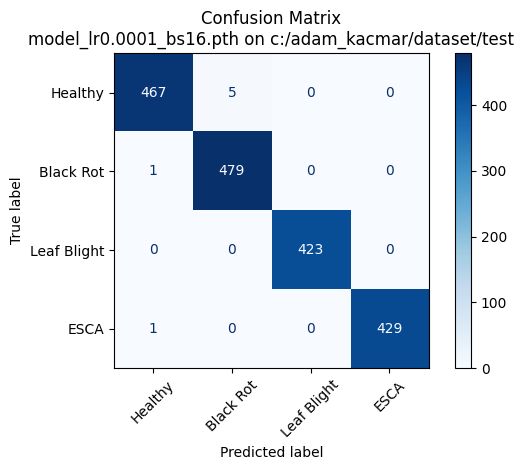


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.9852    0.9852    0.9852       944
   Black Rot     0.9885    0.9885    0.9885       960
 Leaf Blight     0.9988    1.0000    0.9994       846
        ESCA     0.9977    0.9965    0.9971       860

    accuracy                         0.9922      3610
   macro avg     0.9926    0.9926    0.9926      3610
weighted avg     0.9922    0.9922    0.9922      3610



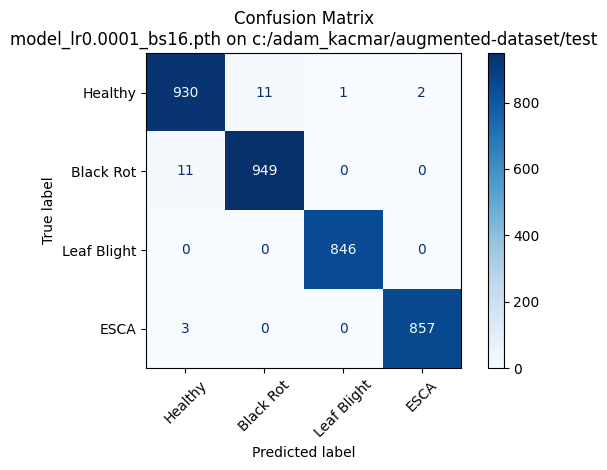

Model: model_lr0.0001_bs32.pth (c:/adam_kacmar/aug-hp-vit-base)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only`


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.9958    0.9936    0.9947       472
   Black Rot     0.9938    0.9979    0.9958       480
 Leaf Blight     1.0000    0.9976    0.9988       423
        ESCA     1.0000    1.0000    1.0000       430

    accuracy                         0.9972      1805
   macro avg     0.9974    0.9973    0.9973      1805
weighted avg     0.9972    0.9972    0.9972      1805



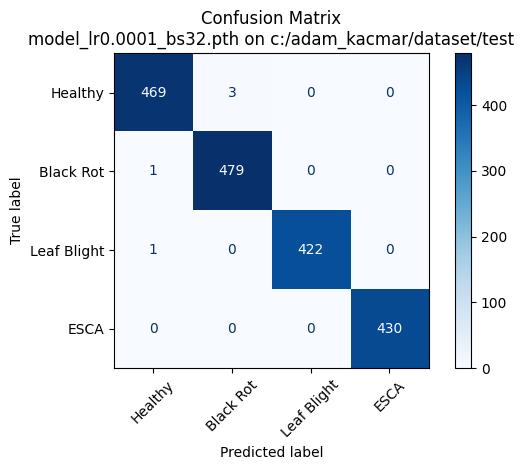


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.9881    0.9714    0.9797       944
   Black Rot     0.9794    0.9896    0.9845       960
 Leaf Blight     0.9941    1.0000    0.9971       846
        ESCA     0.9954    0.9965    0.9959       860

    accuracy                         0.9889      3610
   macro avg     0.9893    0.9894    0.9893      3610
weighted avg     0.9889    0.9889    0.9889      3610



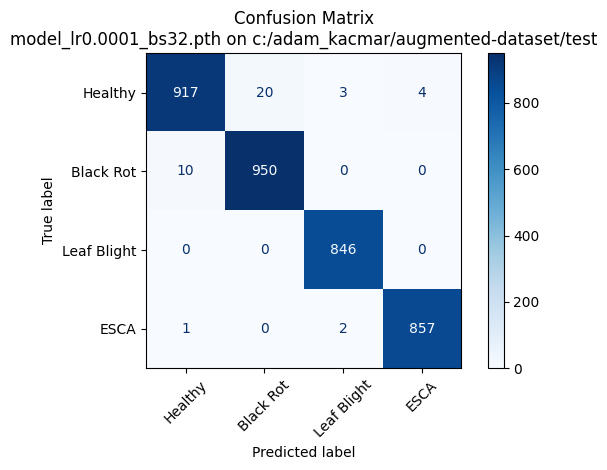

Model: model_lr0.0005_bs16.pth (c:/adam_kacmar/aug-hp-vit-base)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only`


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.9608    0.9343    0.9474       472
   Black Rot     0.9769    0.9708    0.9739       480
 Leaf Blight     0.9906    1.0000    0.9953       423
        ESCA     0.9615    0.9884    0.9748       430

    accuracy                         0.9723      1805
   macro avg     0.9725    0.9734    0.9728      1805
weighted avg     0.9723    0.9723    0.9722      1805



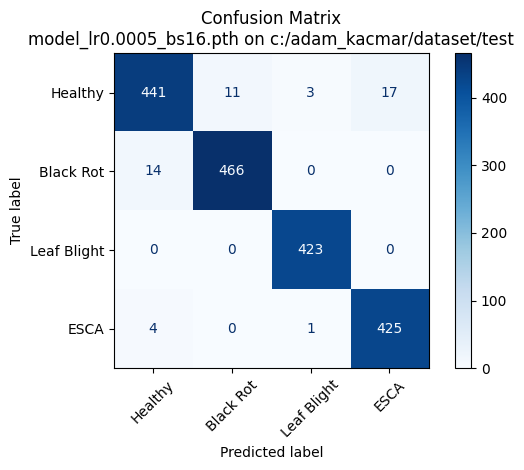


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.9189    0.8877    0.9030       944
   Black Rot     0.9277    0.9354    0.9315       960
 Leaf Blight     0.9724    0.9976    0.9848       846
        ESCA     0.9652    0.9674    0.9663       860

    accuracy                         0.9452      3610
   macro avg     0.9460    0.9471    0.9464      3610
weighted avg     0.9448    0.9452    0.9449      3610



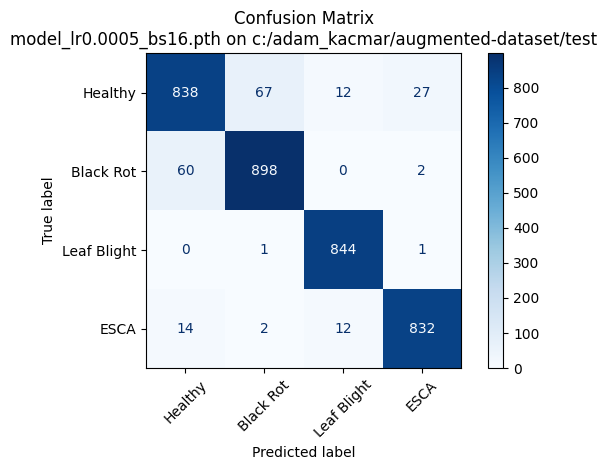

Model: model_lr0.0005_bs32.pth (c:/adam_kacmar/aug-hp-vit-base)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only`


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.9528    0.9831    0.9677       472
   Black Rot     0.9957    0.9625    0.9788       480
 Leaf Blight     1.0000    0.9716    0.9856       423
        ESCA     0.9639    0.9930    0.9782       430

    accuracy                         0.9773      1805
   macro avg     0.9781    0.9776    0.9776      1805
weighted avg     0.9779    0.9773    0.9774      1805



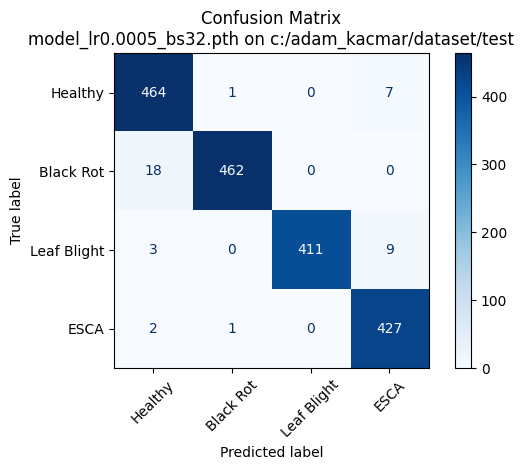


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.9273    0.9597    0.9433       944
   Black Rot     0.9804    0.9396    0.9596       960
 Leaf Blight     0.9894    0.9941    0.9917       846
        ESCA     0.9745    0.9779    0.9762       860

    accuracy                         0.9668      3610
   macro avg     0.9679    0.9678    0.9677      3610
weighted avg     0.9672    0.9668    0.9668      3610



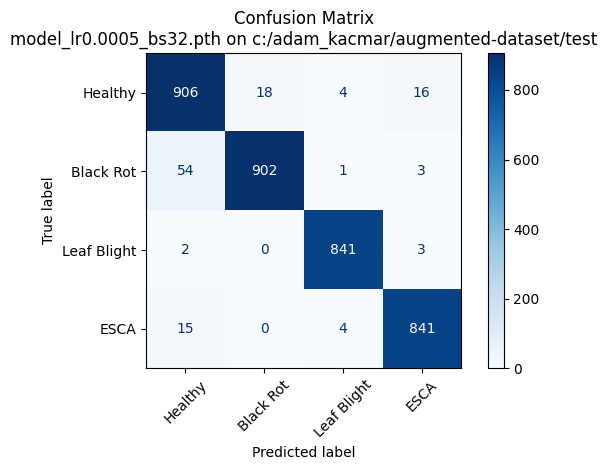

Model: model_lr1e-05_bs16.pth (c:/adam_kacmar/aug-hp-vit-base)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only`


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.9290    0.9979    0.9622       472
   Black Rot     1.0000    0.9292    0.9633       480
 Leaf Blight     1.0000    1.0000    1.0000       423
        ESCA     0.9977    0.9953    0.9965       430

    accuracy                         0.9795      1805
   macro avg     0.9817    0.9806    0.9805      1805
weighted avg     0.9809    0.9795    0.9795      1805



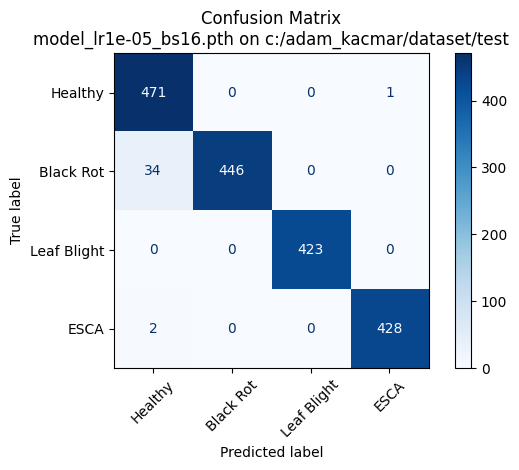


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.9852    0.9862    0.9857       944
   Black Rot     0.9885    0.9865    0.9875       960
 Leaf Blight     0.9988    1.0000    0.9994       846
        ESCA     0.9988    0.9988    0.9988       860

    accuracy                         0.9925      3610
   macro avg     0.9928    0.9929    0.9929      3610
weighted avg     0.9925    0.9925    0.9925      3610



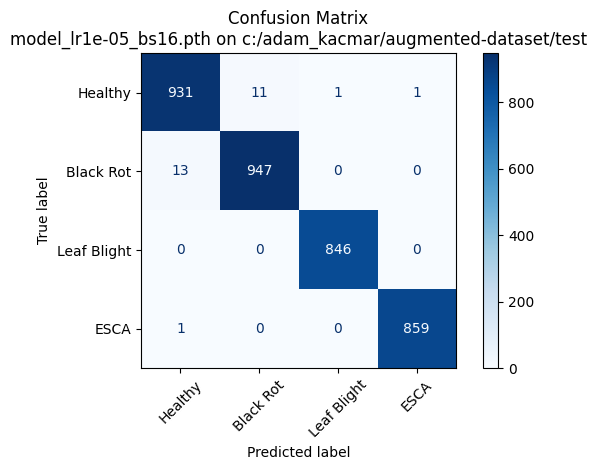

Model: model_lr1e-05_bs32.pth (c:/adam_kacmar/aug-hp-vit-base)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only`


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.9180    0.9958    0.9553       472
   Black Rot     1.0000    0.9125    0.9542       480
 Leaf Blight     0.9930    1.0000    0.9965       423
        ESCA     0.9977    0.9953    0.9965       430

    accuracy                         0.9745      1805
   macro avg     0.9771    0.9759    0.9756      1805
weighted avg     0.9763    0.9745    0.9745      1805



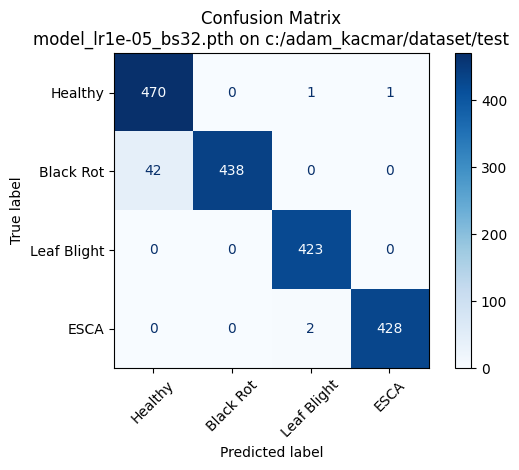


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.9862    0.9862    0.9862       944
   Black Rot     0.9886    0.9896    0.9891       960
 Leaf Blight     0.9988    1.0000    0.9994       846
        ESCA     0.9988    0.9965    0.9977       860

    accuracy                         0.9928      3610
   macro avg     0.9931    0.9931    0.9931      3610
weighted avg     0.9928    0.9928    0.9928      3610



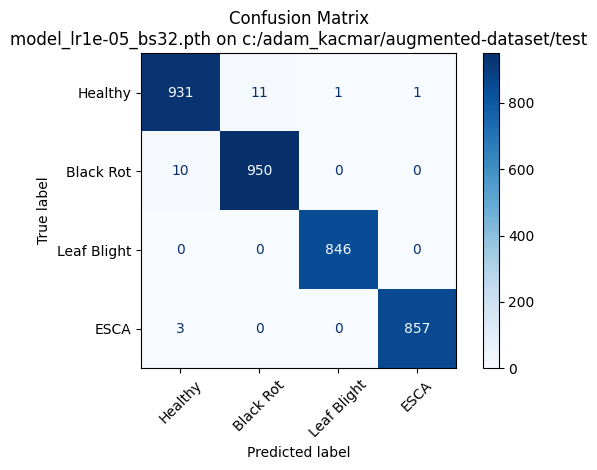

Model: model_lr0.0001_bs16.pth (c:/adam_kacmar/hp-swinv2-base)


Some weights of Swinv2ForImageClassification were not initialized from the model checkpoint at microsoft/swinv2-base-patch4-window8-256 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([4, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     1.0000    0.9979    0.9989       472
   Black Rot     0.9979    1.0000    0.9990       480
 Leaf Blight     1.0000    1.0000    1.0000       423
        ESCA     1.0000    1.0000    1.0000       430

    accuracy                         0.9994      1805
   macro avg     0.9995    0.9995    0.9995      1805
weighted avg     0.9994    0.9994    0.9994      1805



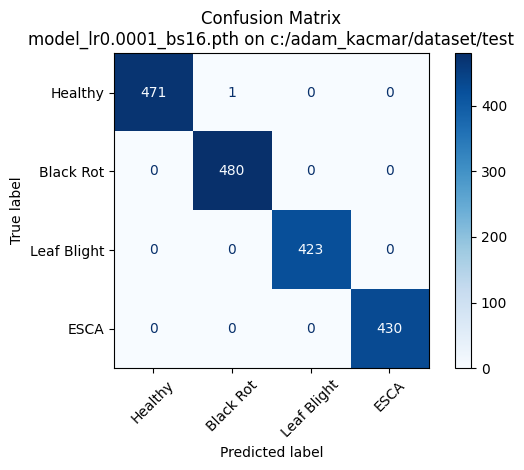


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.7365    0.9650    0.8354       944
   Black Rot     0.8871    0.9000    0.8935       960
 Leaf Blight     0.9679    0.8546    0.9077       846
        ESCA     0.9540    0.7233    0.8228       860

    accuracy                         0.8643      3610
   macro avg     0.8863    0.8607    0.8648      3610
weighted avg     0.8826    0.8643    0.8648      3610



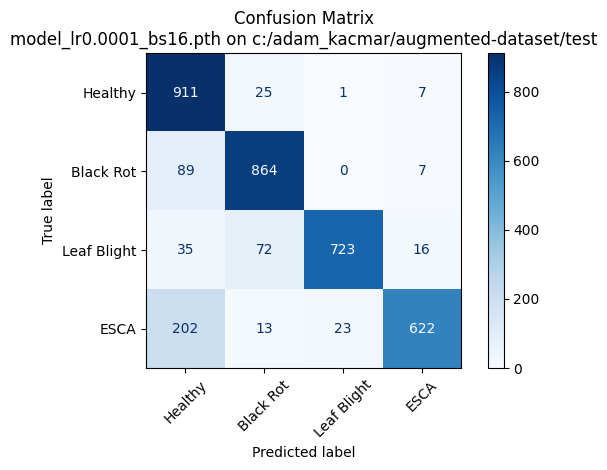

Model: model_lr0.0001_bs32.pth (c:/adam_kacmar/hp-swinv2-base)


Some weights of Swinv2ForImageClassification were not initialized from the model checkpoint at microsoft/swinv2-base-patch4-window8-256 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([4, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.9979    1.0000    0.9989       472
   Black Rot     1.0000    0.9979    0.9990       480
 Leaf Blight     1.0000    1.0000    1.0000       423
        ESCA     1.0000    1.0000    1.0000       430

    accuracy                         0.9994      1805
   macro avg     0.9995    0.9995    0.9995      1805
weighted avg     0.9994    0.9994    0.9994      1805



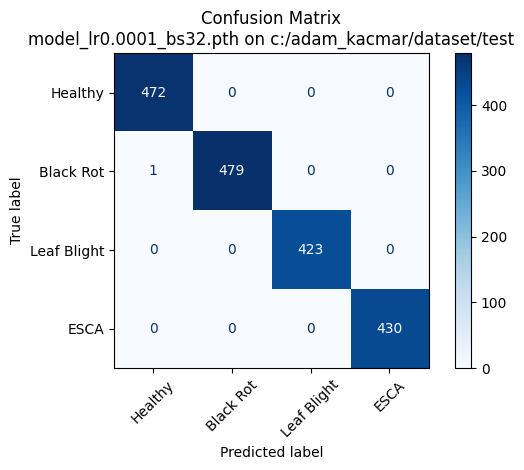


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.8362    0.9735    0.8997       944
   Black Rot     1.0000    0.7812    0.8772       960
 Leaf Blight     1.0000    0.6986    0.8225       846
        ESCA     0.7316    0.9953    0.8433       860

    accuracy                         0.8632      3610
   macro avg     0.8920    0.8622    0.8607      3610
weighted avg     0.8932    0.8632    0.8622      3610



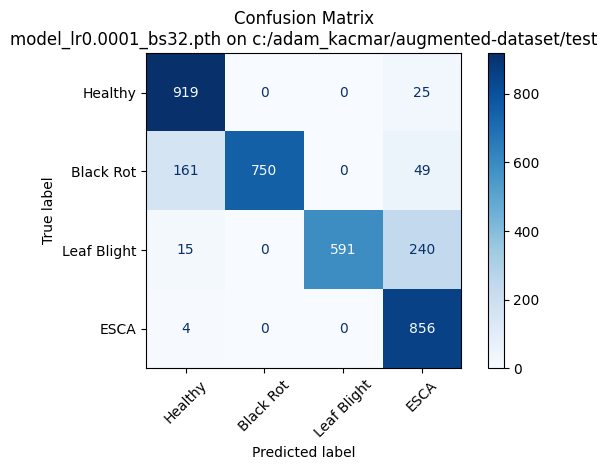

Model: model_lr0.0005_bs16.pth (c:/adam_kacmar/hp-swinv2-base)


Some weights of Swinv2ForImageClassification were not initialized from the model checkpoint at microsoft/swinv2-base-patch4-window8-256 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([4, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.9690    0.9936    0.9812       472
   Black Rot     1.0000    0.9563    0.9776       480
 Leaf Blight     0.9906    1.0000    0.9953       423
        ESCA     0.9885    1.0000    0.9942       430

    accuracy                         0.9867      1805
   macro avg     0.9870    0.9875    0.9871      1805
weighted avg     0.9870    0.9867    0.9866      1805



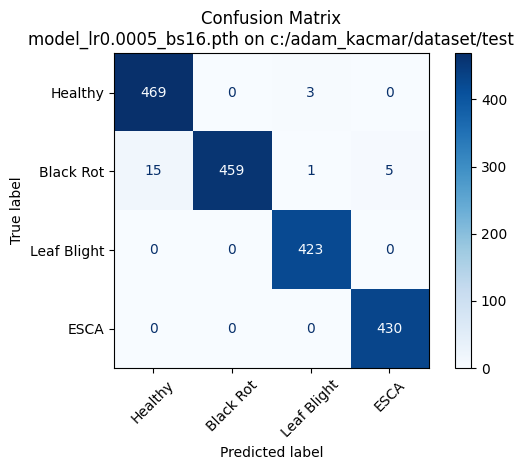


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.7062    0.4481    0.5483       944
   Black Rot     0.8146    0.3250    0.4646       960
 Leaf Blight     1.0000    0.0177    0.0348       846
        ESCA     0.3153    0.9581    0.4745       860

    accuracy                         0.4360      3610
   macro avg     0.7090    0.4372    0.3806      3610
weighted avg     0.7108    0.4360    0.3881      3610



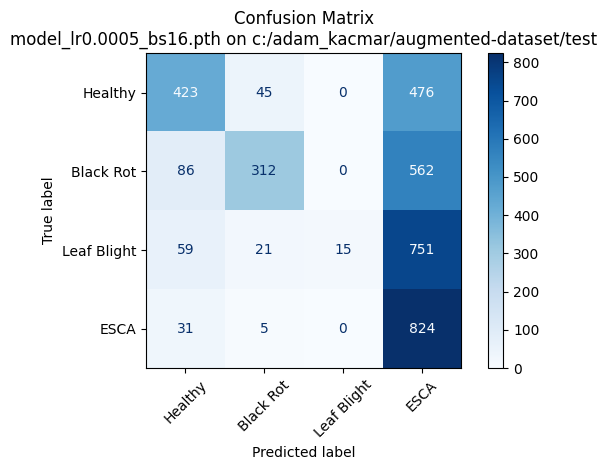

Model: model_lr0.0005_bs32.pth (c:/adam_kacmar/hp-swinv2-base)


Some weights of Swinv2ForImageClassification were not initialized from the model checkpoint at microsoft/swinv2-base-patch4-window8-256 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([4, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.9833    0.9958    0.9895       472
   Black Rot     1.0000    0.9917    0.9958       480
 Leaf Blight     0.9930    1.0000    0.9965       423
        ESCA     1.0000    0.9884    0.9942       430

    accuracy                         0.9939      1805
   macro avg     0.9941    0.9940    0.9940      1805
weighted avg     0.9940    0.9939    0.9939      1805



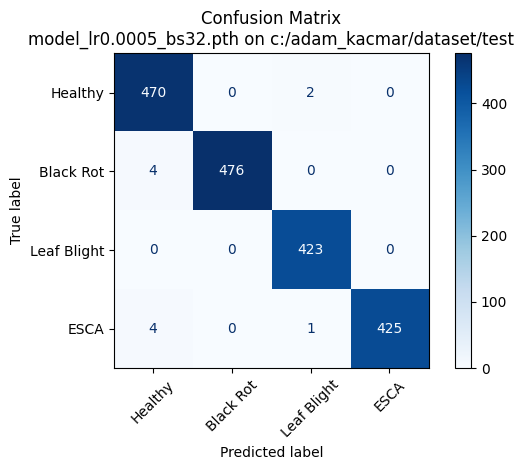


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.7824    0.3199    0.4541       944
   Black Rot     0.6289    0.6656    0.6468       960
 Leaf Blight     1.0000    0.0012    0.0024       846
        ESCA     0.3262    0.8372    0.4695       860

    accuracy                         0.4604      3610
   macro avg     0.6844    0.4560    0.3932      3610
weighted avg     0.6839    0.4604    0.4032      3610



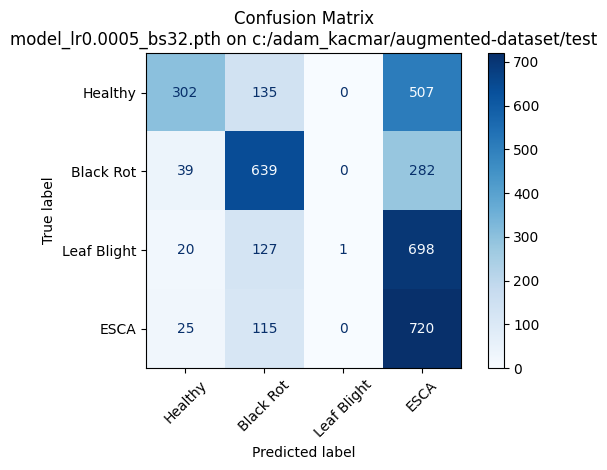

Model: model_lr1e-05_bs16.pth (c:/adam_kacmar/hp-swinv2-base)


Some weights of Swinv2ForImageClassification were not initialized from the model checkpoint at microsoft/swinv2-base-patch4-window8-256 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([4, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     1.0000    1.0000    1.0000       472
   Black Rot     1.0000    1.0000    1.0000       480
 Leaf Blight     1.0000    1.0000    1.0000       423
        ESCA     1.0000    1.0000    1.0000       430

    accuracy                         1.0000      1805
   macro avg     1.0000    1.0000    1.0000      1805
weighted avg     1.0000    1.0000    1.0000      1805



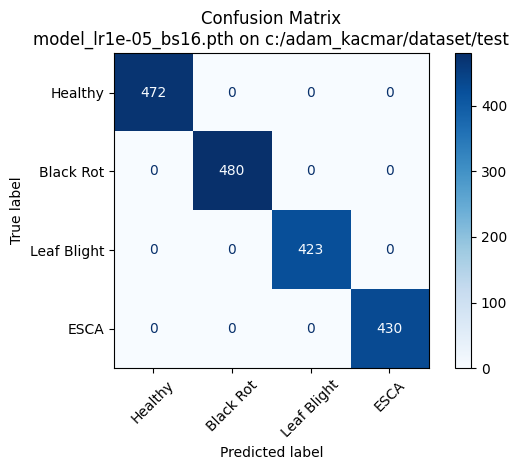


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.5120    0.9915    0.6753       944
   Black Rot     0.9101    0.9281    0.9190       960
 Leaf Blight     1.0000    0.0745    0.1386       846
        ESCA     0.9730    0.8372    0.9000       860

    accuracy                         0.7230      3610
   macro avg     0.8488    0.7078    0.6582      3610
weighted avg     0.8421    0.7230    0.6679      3610



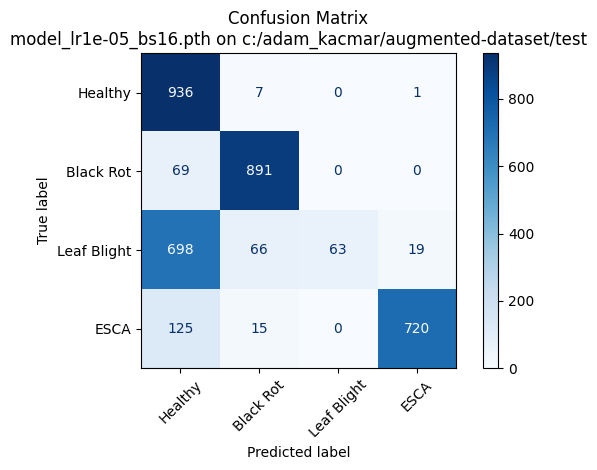

Model: model_lr1e-05_bs32.pth (c:/adam_kacmar/hp-swinv2-base)


Some weights of Swinv2ForImageClassification were not initialized from the model checkpoint at microsoft/swinv2-base-patch4-window8-256 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([4, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     1.0000    1.0000    1.0000       472
   Black Rot     1.0000    1.0000    1.0000       480
 Leaf Blight     1.0000    1.0000    1.0000       423
        ESCA     1.0000    1.0000    1.0000       430

    accuracy                         1.0000      1805
   macro avg     1.0000    1.0000    1.0000      1805
weighted avg     1.0000    1.0000    1.0000      1805



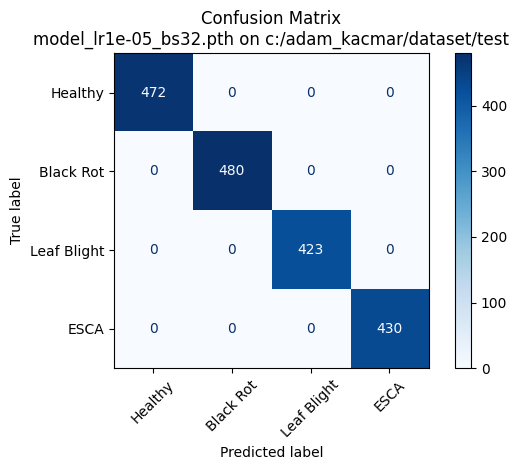


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.4206    0.9989    0.5920       944
   Black Rot     1.0000    0.6312    0.7739       960
 Leaf Blight     0.9815    0.2506    0.3992       846
        ESCA     1.0000    0.6349    0.7767       860

    accuracy                         0.6391      3610
   macro avg     0.8505    0.6289    0.6355      3610
weighted avg     0.8442    0.6391    0.6392      3610



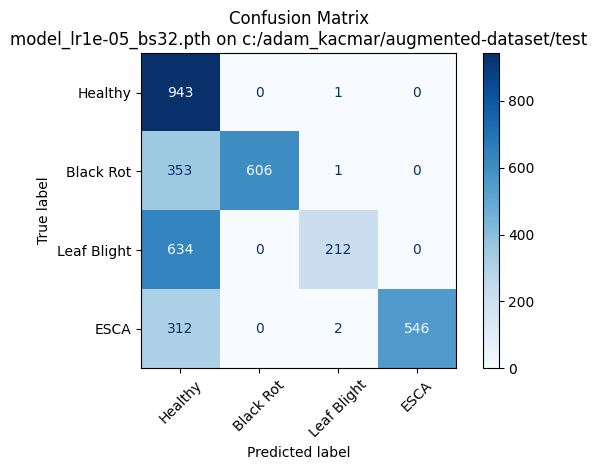

Model: model_lr0.0001_bs16.pth (c:/adam_kacmar/hp-vit-base)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only`


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     1.0000    1.0000    1.0000       472
   Black Rot     1.0000    1.0000    1.0000       480
 Leaf Blight     1.0000    1.0000    1.0000       423
        ESCA     1.0000    1.0000    1.0000       430

    accuracy                         1.0000      1805
   macro avg     1.0000    1.0000    1.0000      1805
weighted avg     1.0000    1.0000    1.0000      1805



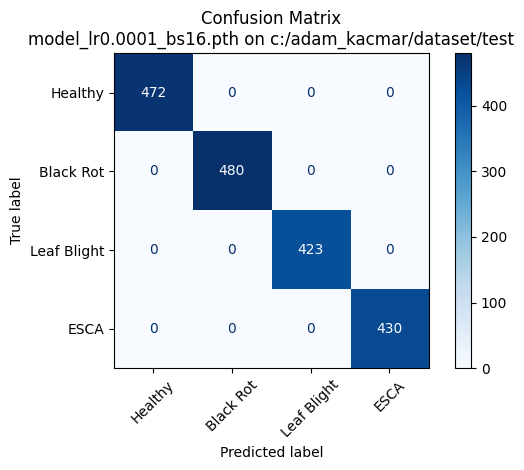


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.9281    0.4237    0.5818       944
   Black Rot     0.5690    0.8115    0.6690       960
 Leaf Blight     0.9809    0.3641    0.5310       846
        ESCA     0.5087    0.8849    0.6460       860

    accuracy                         0.6227      3610
   macro avg     0.7467    0.6210    0.6070      3610
weighted avg     0.7451    0.6227    0.6084      3610



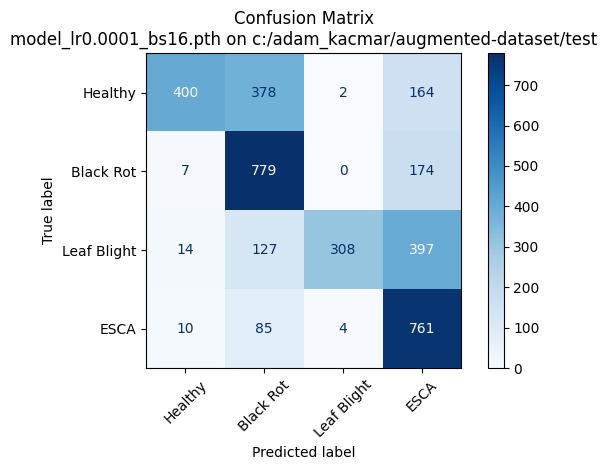

Model: model_lr0.0001_bs32.pth (c:/adam_kacmar/hp-vit-base)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only`


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.9979    1.0000    0.9989       472
   Black Rot     1.0000    0.9979    0.9990       480
 Leaf Blight     1.0000    1.0000    1.0000       423
        ESCA     1.0000    1.0000    1.0000       430

    accuracy                         0.9994      1805
   macro avg     0.9995    0.9995    0.9995      1805
weighted avg     0.9994    0.9994    0.9994      1805



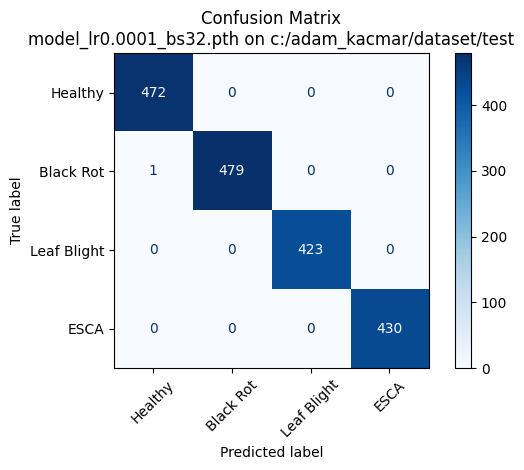


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.8380    0.9206    0.8773       944
   Black Rot     0.9925    0.8313    0.9048       960
 Leaf Blight     0.9969    0.7518    0.8571       846
        ESCA     0.7436    0.9779    0.8448       860

    accuracy                         0.8709      3610
   macro avg     0.8927    0.8704    0.8710      3610
weighted avg     0.8938    0.8709    0.8721      3610



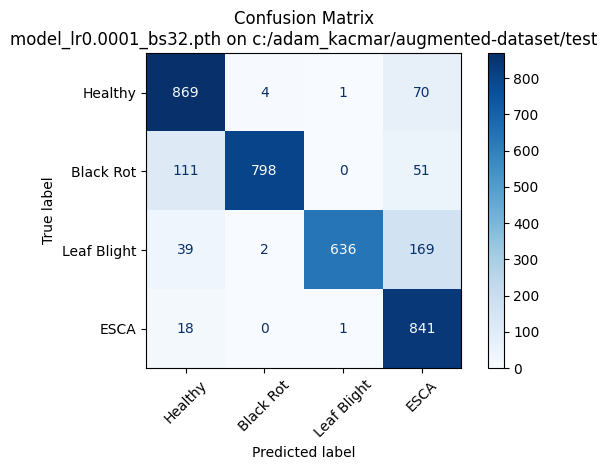

Model: model_lr0.0005_bs16.pth (c:/adam_kacmar/hp-vit-base)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only`


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.9750    0.9915    0.9832       472
   Black Rot     0.9979    0.9750    0.9863       480
 Leaf Blight     0.9953    1.0000    0.9976       423
        ESCA     0.9977    1.0000    0.9988       430

    accuracy                         0.9911      1805
   macro avg     0.9915    0.9916    0.9915      1805
weighted avg     0.9912    0.9911    0.9911      1805



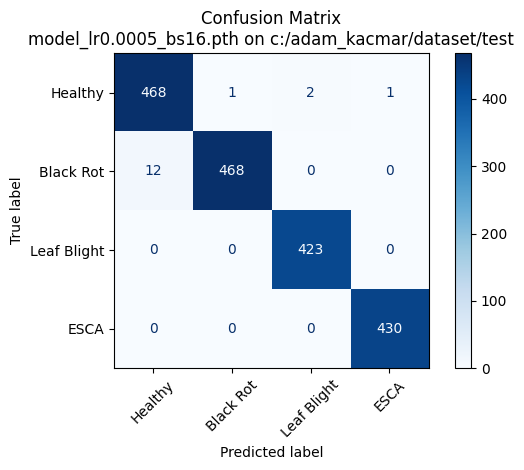


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.6875    0.0583    0.1074       944
   Black Rot     0.5974    0.2875    0.3882       960
 Leaf Blight     1.0000    0.0957    0.1748       846
        ESCA     0.2732    0.9488    0.4242       860

    accuracy                         0.3402      3610
   macro avg     0.6395    0.3476    0.2736      3610
weighted avg     0.6381    0.3402    0.2733      3610



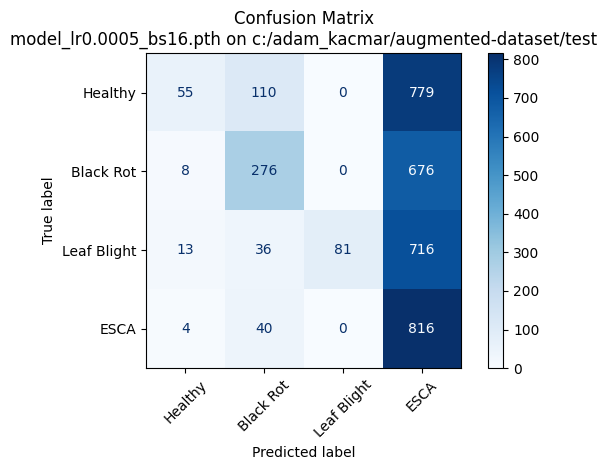

Model: model_lr0.0005_bs32.pth (c:/adam_kacmar/hp-vit-base)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only`


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.9958    0.9979    0.9968       472
   Black Rot     0.9979    0.9958    0.9969       480
 Leaf Blight     1.0000    1.0000    1.0000       423
        ESCA     1.0000    1.0000    1.0000       430

    accuracy                         0.9983      1805
   macro avg     0.9984    0.9984    0.9984      1805
weighted avg     0.9983    0.9983    0.9983      1805



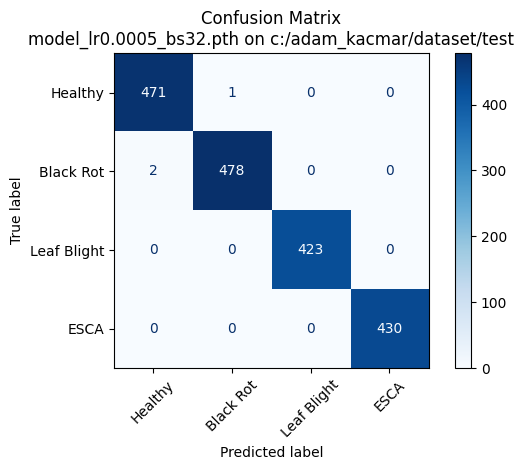


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.7248    0.1144    0.1976       944
   Black Rot     0.4980    0.3823    0.4325       960
 Leaf Blight     1.0000    0.0887    0.1629       846
        ESCA     0.2854    0.8791    0.4309       860

    accuracy                         0.3618      3610
   macro avg     0.6270    0.3661    0.3060      3610
weighted avg     0.6243    0.3618    0.3075      3610



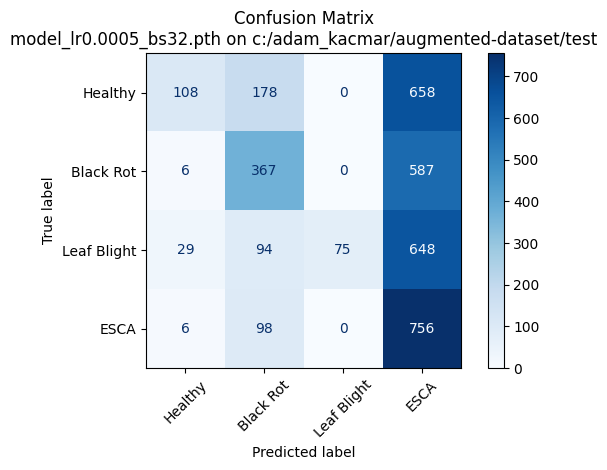

Model: model_lr1e-05_bs16.pth (c:/adam_kacmar/hp-vit-base)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only`


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     0.9958    1.0000    0.9979       472
   Black Rot     1.0000    0.9958    0.9979       480
 Leaf Blight     1.0000    1.0000    1.0000       423
        ESCA     1.0000    1.0000    1.0000       430

    accuracy                         0.9989      1805
   macro avg     0.9989    0.9990    0.9989      1805
weighted avg     0.9989    0.9989    0.9989      1805



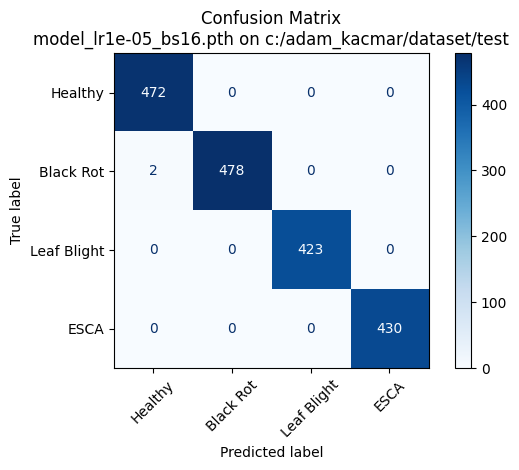


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.9253    0.5508    0.6906       944
   Black Rot     0.7847    0.8844    0.8315       960
 Leaf Blight     0.9891    0.5378    0.6968       846
        ESCA     0.5671    0.9930    0.7219       860

    accuracy                         0.7418      3610
   macro avg     0.8165    0.7415    0.7352      3610
weighted avg     0.8175    0.7418    0.7370      3610



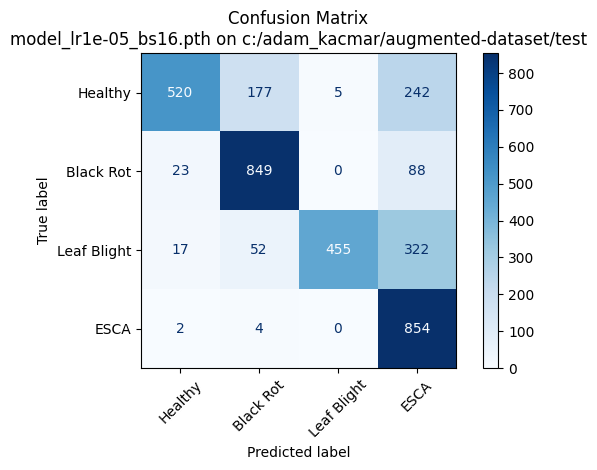

Model: model_lr1e-05_bs32.pth (c:/adam_kacmar/hp-vit-base)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Admin\AppData\Local\Temp\ipykernel_8816\534391586.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only`


Tested on: c:/adam_kacmar/dataset/test
              precision    recall  f1-score   support

     Healthy     1.0000    0.9979    0.9989       472
   Black Rot     0.9979    1.0000    0.9990       480
 Leaf Blight     1.0000    1.0000    1.0000       423
        ESCA     1.0000    1.0000    1.0000       430

    accuracy                         0.9994      1805
   macro avg     0.9995    0.9995    0.9995      1805
weighted avg     0.9994    0.9994    0.9994      1805



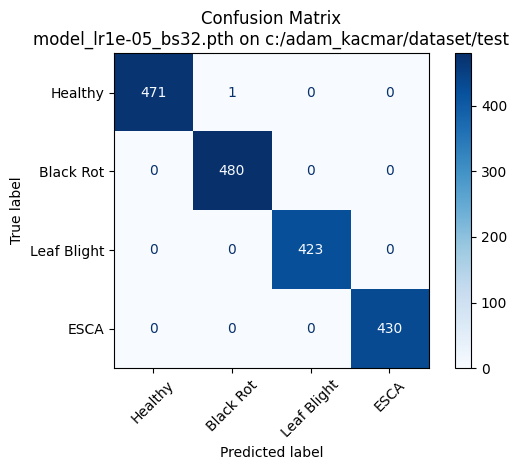


Tested on: c:/adam_kacmar/augmented-dataset/test
              precision    recall  f1-score   support

     Healthy     0.9604    0.5138    0.6694       944
   Black Rot     0.7235    0.9729    0.8299       960
 Leaf Blight     0.9913    0.8097    0.8913       846
        ESCA     0.7400    0.9663    0.8381       860

    accuracy                         0.8130      3610
   macro avg     0.8538    0.8157    0.8072      3610
weighted avg     0.8521    0.8130    0.8043      3610



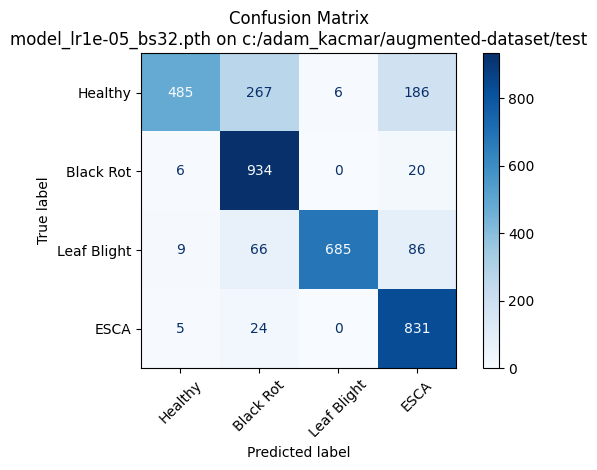

In [ ]:
for model_dir in model_dirs:
    model_type = "swinv2" if "swinv2" in model_dir else "vit"
    model_paths = sorted(glob.glob(os.path.join(model_dir, "*.pth")))

    if model_type == "swinv2":
        transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        ])
    else:
        transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        ])

    dataloaders = {
        root: DataLoader(
            datasets.ImageFolder(root=root, transform=transform),
            batch_size=32,
            shuffle=False
        )
        for root in data_roots
    }

    for model_path in model_paths:
        print(f"Model: {os.path.basename(model_path)} ({model_dir})")

        model = load_model(model_path, model_type)

        for dataset_name, dataloader in dataloaders.items():
            all_preds, all_labels = [], []

            with torch.no_grad():
                for imgs, labels in dataloader:
                    imgs, labels = imgs.to(device), labels.to(device)
                    outputs = model(imgs).logits
                    preds = torch.argmax(outputs, dim=1)

                    all_preds.extend(preds.cpu().numpy())
                    all_labels.extend(labels.cpu().numpy())

            print(f"\nTested on: {dataset_name}")
            report = classification_report(all_labels, all_preds, target_names=class_names, digits=4)
            print(report)

            cm = confusion_matrix(all_labels, all_preds)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
            disp.plot(cmap=plt.cm.Blues)
            plt.title(f"Confusion Matrix\n{os.path.basename(model_path)} on {dataset_name}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()